<a href="https://colab.research.google.com/github/around-star/Object-Recognition/blob/master/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import ImageFont
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/gdrive')
os.chdir('/gdrive/My Drive')
import time

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
module = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module).signatures["default"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
def draw_boxes(image, boxes, class_names, scores, max_boxes = 10, min_score = 0.3):

  font = ImageFont.load_default()
  
  for i in range(boxes.shape[0]):
    if scores[i] >=min_score :
      ymin, xmin, ymax, xmax = boxes[i]
      display_str = "{}: {}%".format(class_names[i].decode("utf-8"), int(100 * scores[i]))

      imheight, imwidth, _ = image.shape
      left, right, top, bottom = int (xmin*imwidth), int (xmax*imwidth), int (ymin*imheight), int (ymax*imheight)
      text_width, text_height = font.getsize(display_str)
      total_str_heights = int ((1 + 0.1 * text_height))

      cv2.rectangle(image, (left, top), (right, bottom), (250,222,50))
      
      margin = int (np.ceil(0.05 * total_str_heights))

      if top > total_str_heights:
        text_bottom = top
      else:
        text_bottom = top + total_str_heights

      cv2.putText(image, display_str, (left + margin, text_bottom - margin), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 1)
      

  return image

In [ ]:
def run_detector(detector, image):
  img = tf.expand_dims(tf.image.convert_image_dtype(image, dtype = tf.float32), axis=0)
  start_time = time.time()
  result = detector(img)
  end_time = time.time()
  result = {key:value.numpy() for key, value in result.items()}
  image_with_boxes = draw_boxes(np.array(image), result["detection_boxes"], result["detection_class_entities"], result["detection_scores"])
  return image_with_boxes

In [ ]:
image = cv2.imread('picture1.jpg')

image_with_boxes = run_detector(detector, image)

In [ ]:
result["detection_scores"]

array([0.778133  , 0.6129098 , 0.59773374, 0.46023774, 0.45624915,
       0.3389598 , 0.2606543 , 0.25355354, 0.24811983, 0.23621595,
       0.21093461, 0.18542896, 0.18303281, 0.14848444, 0.13415706,
       0.10679211, 0.09545081, 0.09105463, 0.08274955, 0.08159795,
       0.08014859, 0.07521895, 0.06927123, 0.06009489, 0.05176265,
       0.04983578, 0.04551886, 0.04412786, 0.04399418, 0.04318152,
       0.0427061 , 0.04233979, 0.0396058 , 0.03898836, 0.03839078,
       0.03800254, 0.03799193, 0.03741337, 0.03293079, 0.03228845,
       0.03124056, 0.03103924, 0.02899439, 0.02788385, 0.02726889,
       0.02655358, 0.02625289, 0.02396634, 0.02370197, 0.0235905 ,
       0.02292277, 0.0226775 , 0.0226035 , 0.02197184, 0.0202156 ,
       0.01764371, 0.01603341, 0.01494579, 0.01484017, 0.0142837 ,
       0.01372201, 0.01291196, 0.01254191, 0.01233181, 0.01215093,
       0.01202879, 0.01167172, 0.01155931, 0.0115433 , 0.01124607,
       0.0109263 , 0.01072208, 0.01055757, 0.01043306, 0.01041

In [ ]:
#image = tf.expand_dims(tf.image.convert_image_dtype(image, dtype = tf.float32), axis=0)

#detector(image)["detection_class_entities"].numpy()

array([b'Pen', b'Plant', b'Plant', b'Football', b'Office supplies',
       b'Office supplies', b'Office supplies', b'Pen', b'Office supplies',
       b'Office supplies', b'Mobile phone', b'Office supplies',
       b'Office supplies', b'Office supplies', b'Ball', b'Houseplant',
       b'Book', b'Pen', b'Computer mouse', b'Toy', b'Pen', b'Ball',
       b'Office supplies', b'Pen', b'Balloon', b'Office supplies',
       b'Office supplies', b'Table', b'Pen', b'Bowling equipment',
       b'Flower', b'Sports equipment', b'Tree', b'Office supplies',
       b'Pen', b'Person', b'Person', b'Plant', b'Pen', b'Pen', b'Flower',
       b'Office supplies', b'Bird', b'Clothing', b'Office supplies',
       b'Office supplies', b'Desk', b'Whiteboard', b'Auto part', b'Toy',
       b'Toy', b'Toy', b'Plant', b'Balloon', b'Bird', b'Animal',
       b'Poster', b'Car', b'Flower', b'Bird', b'Mammal',
       b'Fashion accessory', b'Bowling equipment', b'Pen', b'Balloon',
       b'Mammal', b'Pen', b'Person', b'Spor

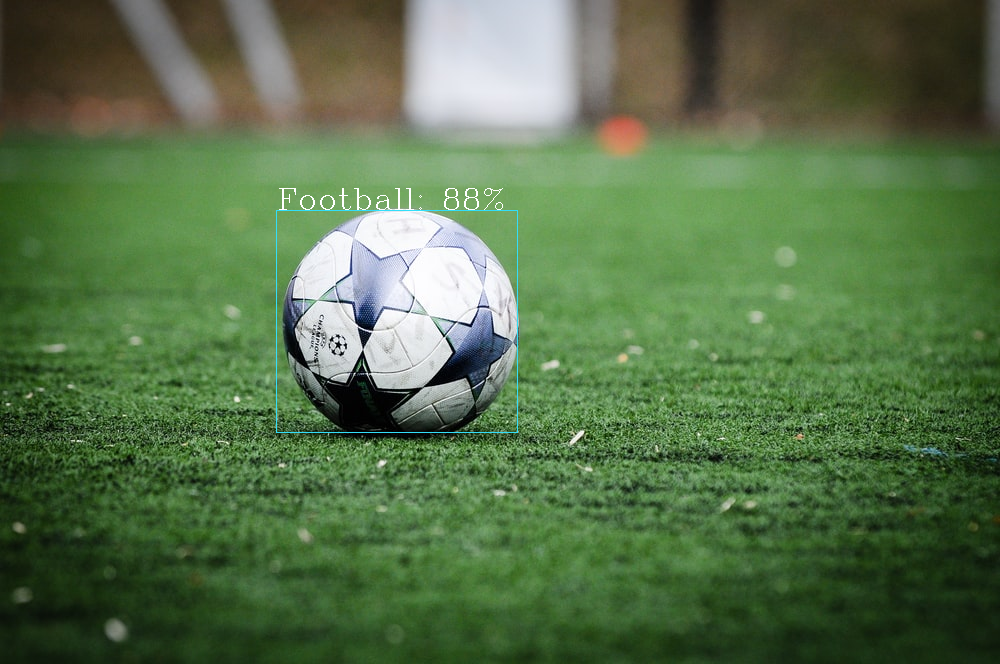

In [ ]:
cv2_imshow(image_with_boxes)

In [ ]:
image2 = cv2.imread("pictire2.jpg")
image2_with_boxes = run_detector(detector, image2)

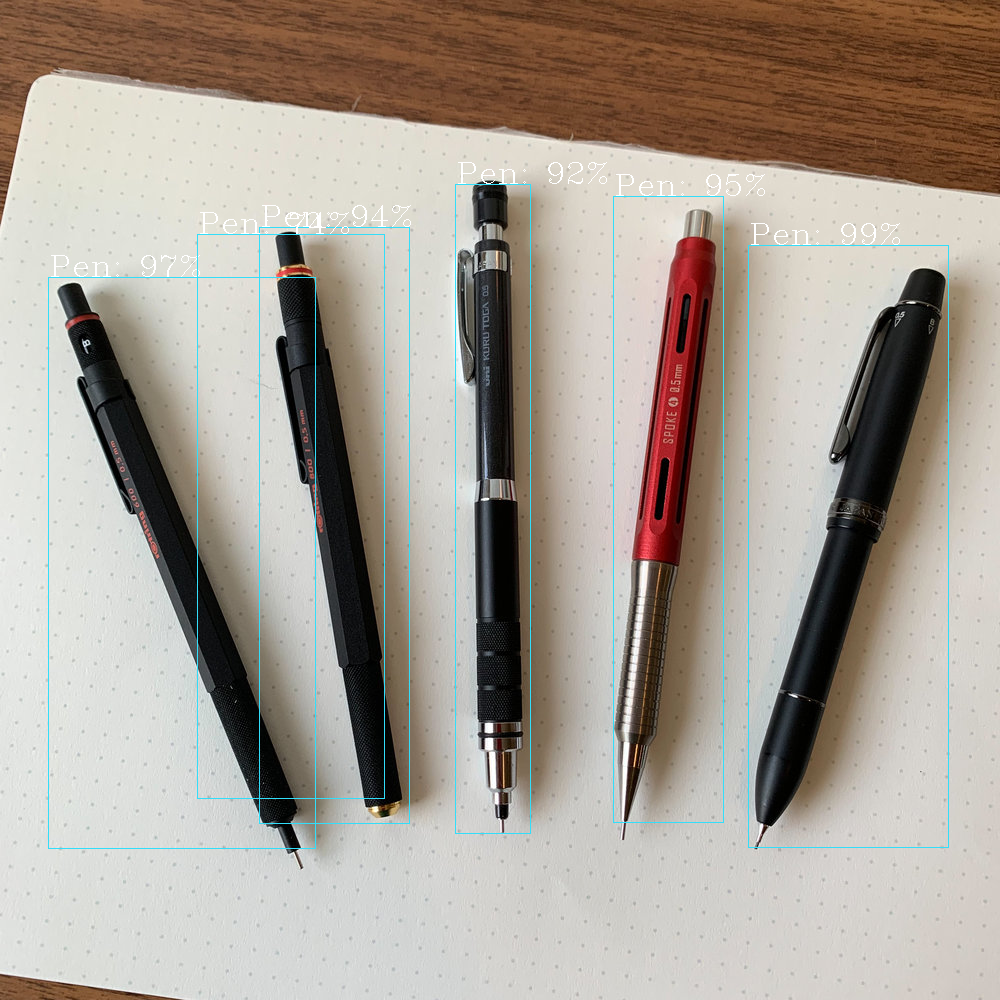

In [ ]:
cv2_imshow(image2_with_boxes)